# ADA Project

### In this intermediate notebook, we will find only the steps for milestone 2 and for the following question

*How much goes to local producers from the cost of an average meal in Switzerland ?*

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get all the input data paths
CROPS_INPUT_DATA_PATH = 'data/global-food-agriculture-statistics/fao_data_crops_data.csv'
PRODUCTION_INPUT_DATA_PATH = 'data/global-food-agriculture-statistics/fao_data_production_indices_data.csv'


In [3]:
# Load all the dataframes needed
crops = pd.read_csv(CROPS_INPUT_DATA_PATH)
production = pd.read_csv(PRODUCTION_INPUT_DATA_PATH)

## A) Investigation to get only data for Switzerland and get all the needed data

In [4]:
# Investigate to get only data for Switzerland
crops.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [5]:
production.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin


In [6]:
print('Country or Area for crops that begin with "Sw" : ', crops[crops['country_or_area'].str.startswith('Sw', na=False)]['country_or_area'].unique())
print('Country or Area for production that begin with "Sw" : ', production[production['country_or_area'].str.startswith('Sw', na=False)]['country_or_area'].unique())

Country or Area for crops that begin with "Sw" :  ['Swaziland' 'Sweden' 'Switzerland']
Country or Area for production that begin with "Sw" :  ['Swaziland' 'Sweden' 'Switzerland']


In [7]:
crops = crops[crops['country_or_area'] == 'Switzerland']
production = production[production['country_or_area'] == 'Switzerland']

In [8]:
crops_category_distinct = crops['category'].unique()
print('All the values of "category" for crops : ', crops_category_distinct)
print('The number of distinct element in "category" for crops : ', crops_category_distinct.size)

All the values of "category" for crops :  ['apples' 'apricots' 'artichokes' 'asparagus' 'barley' 'beans_dry'
 'beans_green' 'berries_nes' 'blueberries' 'broad_beans_horse_beans_dry'
 'cabbages_and_other_brassicas' 'carrots_and_turnips'
 'cauliflowers_and_broccoli' 'cereals_nes' 'cereals_rice_milled_eqv'
 'cereals_total' 'cherries' 'chestnuts' 'chillies_and_peppers_green'
 'coarse_grain_total' 'cucumbers_and_gherkins' 'currants'
 'fruit_excl_melons_total' 'fruit_fresh_nes' 'garlic' 'gooseberries'
 'grapes' 'hops' 'kiwi_fruit' 'leguminous_vegetables_nes'
 'lettuce_and_chicory' 'lupins' 'maize' 'maize_green' 'mixed_grain'
 'mushrooms_and_truffles' 'oats' 'oilcakes_equivalent' 'oilcrops_primary'
 'onions_dry' 'onions_inc_shallots_green' 'other_melons_inc_cantaloupes'
 'peaches_and_nectarines' 'pears' 'peas_dry' 'peas_green'
 'plums_and_sloes' 'potatoes' 'pulses_total' 'pumpkins_squash_and_gourds'
 'quinces' 'rapeseed' 'raspberries' 'roots_and_tubers_total' 'rye'
 'soybeans' 'spinach' 'stra

In [9]:
production_category_distinct = production['category'].unique()
print('All the values of "category" for crops : ', production_category_distinct)
print('The number of distinct element in "category" for crops : ', production_category_distinct.size)

All the values of "category" for crops :  ['agriculture_pin' 'crops_pin' 'food_pin' 'livestock_pin' 'non_food_pin']
The number of distinct element in "category" for crops :  5


#### A) Comments

* 68 distinct values in `categories` for crops 
* 5 distinct values in `categories` for production

With the investigation on the web we have done, we can definitely say that these data are not sufficient to answer to our question. Hence, we need the raw data.

In [54]:
# Get input path for raw data
CROPS_COMMODITY_PATH = 'data/FAOSTAT/CommodityBalances_Crops_E_All_Data_(Normalized).zip'
LIVESTOCK_COMMODITY_PATH = 'data/FAOSTAT/CommodityBalances_LivestockFish_E_All_Data_(Normalized).zip'

CROPS_FOOD_SUPPLY_PATH = 'data/FAOSTAT/FoodSupply_Crops_E_All_Data_(Normalized).zip'
LIVESTOCK_FOOD_SUPPLY_PATH = 'data/FAOSTAT/FoodSupply_LivestockFish_E_All_Data_(Normalized).zip'

PRICES_PATH = 'data/FAOSTAT/Prices_E_All_Data_(Normalized).zip'

CROPS_PRODUCTION_PATH = 'data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).zip'
LIVESTOCK_PRODUCTION_PATH = 'data/FAOSTAT/Production_Livestock_E_All_Data_(Normalized).zip'

CROPS_COMMODITY_ITEM_GROUP_PATH = 'data/FAOSTAT/FAOSTAT_commodity_crops_item_group.csv'
LIVESTOCK_COMMODITY_ITEM_GROUP_PATH = 'data/FAOSTAT/FAOSTAT_commodity_livestock_item_group.csv'

In [11]:
# Load and create all dataframes

crops_commodity = pd.read_csv(CROPS_COMMODITY_PATH, encoding='ISO-8859-1')
livestock_commodity = pd.read_csv(LIVESTOCK_COMMODITY_PATH, encoding='ISO-8859-1')

crops_food_supply = pd.read_csv(CROPS_FOOD_SUPPLY_PATH, encoding='ISO-8859-1')
livestock_food_supply = pd.read_csv(LIVESTOCK_FOOD_SUPPLY_PATH, encoding='ISO-8859-1')

prices = pd.read_csv(PRICES_PATH, encoding='ISO-8859-1')

crops_production = pd.read_csv(CROPS_PRODUCTION_PATH, encoding='ISO-8859-1')
livestock_production = pd.read_csv(LIVESTOCK_PRODUCTION_PATH, encoding='ISO-8859-1')


In [55]:
crops_commodity_item_group = pd.read_csv(CROPS_COMMODITY_ITEM_GROUP_PATH, encoding='ISO-8859-1')
livestock_commodity_item_group = pd.read_csv(LIVESTOCK_COMMODITY_ITEM_GROUP_PATH, encoding='ISO-8859-1')

## B.1) Investigation for food supply

In [12]:
crops_food_supply.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2617,Apples and products,641,Food supply quantity (tonnes),1961,1961,tonnes,14345.0,S


In [13]:
livestock_food_supply.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2731,Bovine Meat,641,Food supply quantity (tonnes),1961,1961,tonnes,43000.0,S


In [14]:
# We want to keep only the data for Switzerland
crops_food_supply = crops_food_supply[crops_food_supply['Area'] == 'Switzerland']
livestock_food_supply = livestock_food_supply[livestock_food_supply['Area'] == 'Switzerland']

### B.1) Comments #1

We want to concatenate the dataframes `crops_food_supply` and `livestock_food_supply` into `food_supply`, which summarize all the food supplies. By doing that, we quickly check that the element are the same, so we will be able to work with the new dataframe without any issue.

In [15]:
crops_food_supply['Element'].unique()

array(['Food supply quantity (tonnes)',
       'Food supply quantity (g/capita/day)',
       'Food supply quantity (kg/capita/yr)',
       'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)'], dtype=object)

In [16]:
livestock_food_supply['Element'].unique()

array(['Food supply quantity (tonnes)',
       'Food supply quantity (g/capita/day)',
       'Food supply quantity (kg/capita/yr)',
       'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)'], dtype=object)

In [17]:
food_supply = pd.concat([crops_food_supply, livestock_food_supply], ignore_index=True)
food_supply.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,211,Switzerland,2617,Apples and products,641,Food supply quantity (tonnes),1961,1961,tonnes,162964.10,S
1,211,Switzerland,2617,Apples and products,641,Food supply quantity (tonnes),1962,1962,tonnes,533729.23,S
2,211,Switzerland,2617,Apples and products,641,Food supply quantity (tonnes),1963,1963,tonnes,273304.72,S
3,211,Switzerland,2617,Apples and products,641,Food supply quantity (tonnes),1964,1964,tonnes,410685.71,S
4,211,Switzerland,2617,Apples and products,641,Food supply quantity (tonnes),1965,1965,tonnes,467451.57,S


In [19]:
print('Dimension for crops food supply : ', crops_food_supply.shape)
print('Dimension for livestock food supply : ', livestock_food_supply.shape)
print('Dimension for food supply : ', food_supply.shape)

Dimension for crops food supply :  (24645, 11)
Dimension for livestock food supply :  (10441, 11)
Dimension for food supply :  (35086, 11)


### B.1) Comments #2

Now, we want to have the values for `Element` as a column so it will ease the vizualization of the data.

In [21]:
values_wide = food_supply.pivot_table(index=['Item', 'Year'], columns='Element', values='Value')
values_wide.head()

Element                   Fat supply quantity (g/capita/day)  \
Item                Year                                       
Alcoholic Beverages 1961                                 NaN   
                    1962                                 NaN   
                    1963                                 NaN   
                    1964                                 NaN   
                    1965                                 NaN   

Element                   Food supply (kcal/capita/day)  \
Item                Year                                  
Alcoholic Beverages 1961                          209.0   
                    1962                          212.0   
                    1963                          211.0   
                    1964                          213.0   
                    1965                          205.0   

Element                   Food supply quantity (g/capita/day)  \
Item                Year                                        
Alcoholic Beverages 1961                               335.70   
                    1962                               358.47   
                    1963                               355.05   
                    1964                               361.90   
                    1965                               342.17   

Element                   Food supply quantity (kg/capita/yr)  \
Item                Year                                        
Alcoholic Beverages 1961                               122.53   
                    1962                               130.84   
                    1963                               129.59   
                    1964                               132.09   
                    1965                               124.89   

Element                   Food supply quantity (tonnes)  \
Item                Year                                  
Alcoholic Beverages 1961                       660799.0   
                    1962                       720030.0   
                    1963                       728062.0   
                    1964                       756761.0   
                    1965                       728122.0   

Element                   Protein supply quantity (g/capita/day)  
Item                Year                                          
Alcoholic Beverages 1961                                    1.01  
                    1962                                    1.06  
                    1963                                    1.10  
                    1964                                    1.13  
                    1965                                    1.08

In [22]:
food_supply_wide = food_supply[['Area', 'Item', 'Year']]\
                    .merge(values_wide, right_index=True, left_on=['Item', 'Year'])\
                    .drop_duplicates()
        
food_supply_wide.head()

,Area,Item,Year,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (g/capita/day),Food supply quantity (kg/capita/yr),Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
0,Switzerland,Apples and products,1961,0.32,40.0,82.79,30.22,162964.10,0.25
1,Switzerland,Apples and products,1962,0.44,71.0,265.72,96.99,533729.23,0.54
2,Switzerland,Apples and products,1963,0.33,47.0,133.28,48.65,273304.72,0.33
3,Switzerland,Apples and products,1964,0.36,59.0,196.40,71.69,410685.71,0.44
4,Switzerland,Apples and products,1965,0.39,63.0,219.67,80.18,467451.57,0.47


In [120]:
food_supply_wide['Item'].unique()

array(['Apples and products', 'Bananas', 'Barley and products', 'Beans',
       'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented',
       'Cereals, Other', 'Citrus, Other', 'Cloves',
       'Cocoa Beans and products', 'Coconut Oil', 'Coconuts - Incl Copra',
       'Coffee and products', 'Cottonseed Oil', 'Dates', 'Fruits, Other',
       'Grapefruit and products', 'Grapes and products (excl wine)',
       'Groundnut Oil', 'Groundnuts (in Shell Eq)',
       'Groundnuts (Shelled Eq)', 'Infant food',
       'Lemons, Limes and products', 'Maize and products',
       'Maize Germ Oil', 'Millet and products', 'Miscellaneous',
       'Nuts and products', 'Oats', 'Oilcrops Oil, Other',
       'Oilcrops, Other', 'Olive Oil', 'Olives (including preserved)',
       'Onions', 'Oranges, Mandarines', 'Palm Oil', 'Palmkernel Oil',
       'Peas', 'Pepper', 'Pimento', 'Pineapples and products',
       'Plantains', 'Potatoes and products', 'Pulses, Other and products',
       'Rape and Mustard Oil', 

In [114]:
food_supply_wide[food_supply_wide['Item'] == 'Cereals - Excluding Beer']

,Area,Item,Year,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (g/capita/day),Food supply quantity (kg/capita/yr),Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
20564,Switzerland,Cereals - Excluding Beer,1961,4.22,1020.0,380.49,138.88,748973.85,32.43
20565,Switzerland,Cereals - Excluding Beer,1962,3.55,868.0,321.64,117.40,646048.26,27.39
20566,Switzerland,Cereals - Excluding Beer,1963,3.75,920.0,342.04,124.84,701376.12,28.97
20567,Switzerland,Cereals - Excluding Beer,1964,3.55,872.0,326.00,118.99,681700.46,27.38
20568,Switzerland,Cereals - Excluding Beer,1965,3.75,903.0,339.44,123.89,722307.13,28.42
20569,Switzerland,Cereals - Excluding Beer,1966,3.42,853.0,315.44,115.14,681266.26,26.76
20570,Switzerland,Cereals - Excluding Beer,1967,3.19,796.0,294.70,107.57,644543.31,25.14
20571,Switzerland,Cereals - Excluding Beer,1968,3.28,817.0,301.09,109.90,665532.69,25.90
20572,Switzerland,Cereals - Excluding Beer,1969,3.21,805.0,299.55,109.33,668580.88,25.61
20573,Switzerland,Cereals - Excluding Beer,1970,3.24,810.0,298.90,109.10,673039.86,25.56


In [65]:
food_supply_wide[food_supply_wide['Year'] == 2013].head()

,Area,Item,Year,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (g/capita/day),Food supply quantity (kg/capita/yr),Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
52,Switzerland,Apples and products,2013,0.16,25.0,54.59,19.93,160967.5,0.17
370,Switzerland,Bananas,2013,0.03,17.0,27.24,9.94,80313.0,0.22
688,Switzerland,Barley and products,2013,0.02,8.0,4.48,1.63,13200.0,0.22
1006,Switzerland,Beans,2013,0.01,2.0,0.68,0.25,2000.0,0.14
1324,Switzerland,Beer,2013,NaN,75.0,154.06,56.23,454229.0,0.77


In [66]:
food_supply_per_year = food_supply_wide.groupby('Year').agg(sum)
food_supply_per_year.head()

,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (g/capita/day),Food supply quantity (kg/capita/yr),Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
Year,,,,,,
1961,533.79,15439.0,5660.91,2066.23,11143184.16,379.76
1962,551.45,15085.0,5730.15,2091.54,11509584.10,359.59
1963,544.88,14565.0,5512.89,2012.22,11304522.67,364.62
1964,558.49,14832.0,5551.18,2026.14,11608050.22,362.65
1965,547.24,14811.0,5580.48,2036.86,11874885.02,365.88


In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(food_supply_per_year)
food_supply_per_year_scaled = pd.DataFrame(scaler.transform(food_supply_per_year))
food_supply_per_year_scaled.columns = food_supply_per_year.columns
food_supply_per_year_scaled.index = food_supply_per_year.index

In [78]:
food_supply_per_year_scaled.head()

,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (g/capita/day),Food supply quantity (kg/capita/yr),Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
Year,,,,,,
1961,0.000000,1.000000,0.916481,0.916369,0.000000,0.671186
1962,0.164401,0.802566,1.000000,1.000000,0.087091,0.243856
1963,0.103240,0.512549,0.737935,0.737906,0.038349,0.350424
1964,0.229939,0.661461,0.784121,0.783902,0.110496,0.308686
1965,0.125209,0.649749,0.819464,0.819323,0.173921,0.377119


In [82]:
food_supply_per_year_scaled.columns

Index(['Fat supply quantity (g/capita/day)', 'Food supply (kcal/capita/day)',
       'Food supply quantity (g/capita/day)',
       'Food supply quantity (kg/capita/yr)', 'Food supply quantity (tonnes)',
       'Protein supply quantity (g/capita/day)'],
      dtype='object')

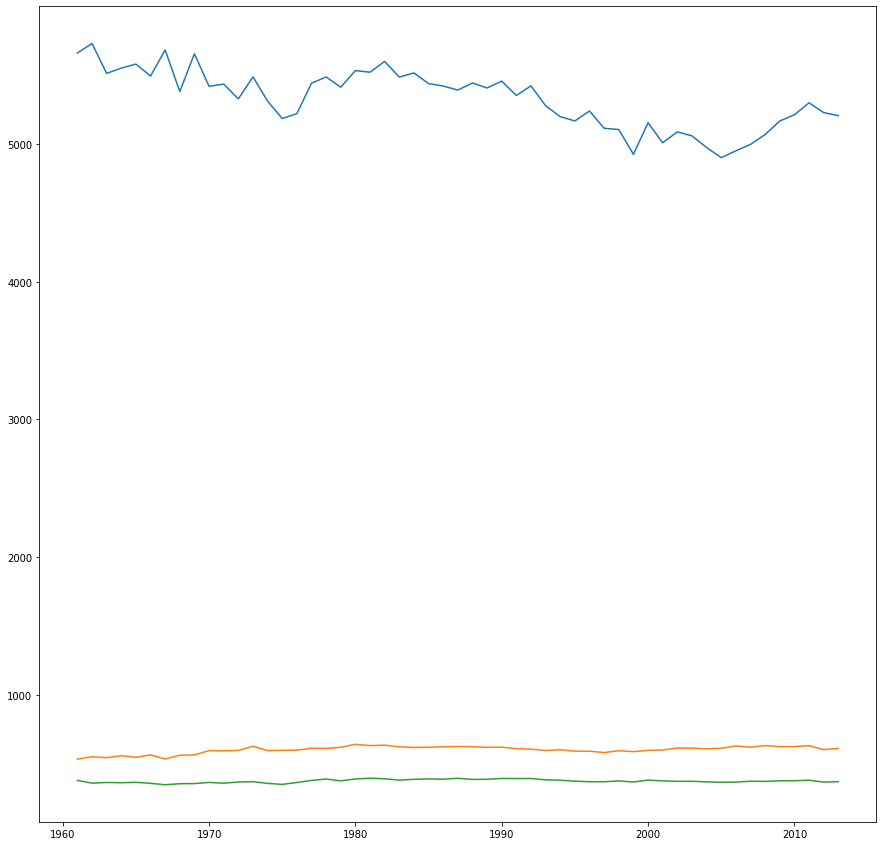

In [94]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(food_supply_per_year.index, food_supply_per_year['Food supply quantity (g/capita/day)'], label="Food supply quantity (g/capita/day)")
ax.plot(food_supply_per_year.index, food_supply_per_year['Fat supply quantity (g/capita/day)'], label="Fat supply quantity (g/capita/day)")
ax.plot(food_supply_per_year.index, food_supply_per_year['Protein supply quantity (g/capita/day)'], label="Protein supply quantity (g/capita/day)")
ax.legend
plt.show()

In [95]:
FOOD_BALANCE_PATH = 'data/FAOSTAT/FoodBalanceSheets_E_All_Data_(Normalized).zip'

food_balance = pd.read_csv(FOOD_BALANCE_PATH, encoding='ISO-8859-1')

In [97]:
food_balance = food_balance[food_balance['Area'] == 'Switzerland']

In [122]:
food_balance.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
7741481,211,Switzerland,2501,Population,511,Total Population - Both sexes,1961,1961,1000 persons,5393.0,NaN
7741482,211,Switzerland,2501,Population,511,Total Population - Both sexes,1962,1962,1000 persons,5503.0,NaN
7741483,211,Switzerland,2501,Population,511,Total Population - Both sexes,1963,1963,1000 persons,5618.0,NaN
7741484,211,Switzerland,2501,Population,511,Total Population - Both sexes,1964,1964,1000 persons,5729.0,NaN
7741485,211,Switzerland,2501,Population,511,Total Population - Both sexes,1965,1965,1000 persons,5830.0,NaN


In [126]:
food_balance.size

664620

In [137]:
food_balance['Element'].unique()

array(['Total Population - Both sexes', 'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity',
       'Domestic supply quantity', 'Feed', 'Seed', 'Losses', 'Processing',
       'Other uses', 'Food', 'Food supply quantity (kg/capita/yr)'],
      dtype=object)

In [138]:
food_balance['Item'].unique()

array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
       'Cereals - Excluding Beer', 'Wheat and products',
       'Rice (Milled Equivalent)', 'Barley and products',
       'Maize and products', 'Rye and products', 'Oats',
       'Millet and products', 'Sorghum and products', 'Cereals, Other',
       'Starchy Roots', 'Cassava and products', 'Potatoes and products',
       'Sweet potatoes', 'Yams', 'Roots, Other', 'Sugar Crops',
       'Sugar cane', 'Sugar beet', 'Sugar & Sweeteners',
       'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Honey', 'Pulses',
       'Beans', 'Peas', 'Pulses, Other and products', 'Treenuts',
       'Nuts and products', 'Oilcrops', 'Soyabeans',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed', 'Coconuts - Incl Copra',
       'Sesame seed', 'Palm kernels', 'Olives (including preserved)',
       'Oilcrops, Other', 'Vegetable Oils', 'Soyabean Oil',
       'Groundnut Oil', 'Sunflowerseed Oil'

In [127]:
values_wide = food_balance.pivot_table(index=['Area', 'Item', 'Year'], columns='Element', values='Value')
values_wide.head()

Element                             Domestic supply quantity  Export Quantity  \
Area        Item              Year                                              
Switzerland Alcohol, Non-Food 1961                       7.0              0.0   
                              1962                       8.0              0.0   
                              1963                      11.0              0.0   
                              1964                      18.0              0.0   
                              1965                      19.0              0.0   

Element                             Fat supply quantity (g/capita/day)  Feed  \
Area        Item              Year                                             
Switzerland Alcohol, Non-Food 1961                                 NaN   NaN   
                              1962                                 NaN   NaN   
                              1963                                 NaN   NaN   
                              1964                                 NaN   NaN   
                              1965                                 NaN   NaN   

Element                             Food  Food supply (kcal/capita/day)  \
Area        Item              Year                                        
Switzerland Alcohol, Non-Food 1961   NaN                            NaN   
                              1962   NaN                            NaN   
                              1963   NaN                            NaN   
                              1964   NaN                            NaN   
                              1965   NaN                            NaN   

Element                             Food supply quantity (kg/capita/yr)  \
Area        Item              Year                                        
Switzerland Alcohol, Non-Food 1961                                  NaN   
                              1962                                  NaN   
                              1963                                  NaN   
                              1964                                  NaN   
                              1965                                  NaN   

Element                             Import Quantity  Losses  Other uses  \
Area        Item              Year                                        
Switzerland Alcohol, Non-Food 1961              7.0     NaN         7.0   
                              1962              8.0     NaN         8.0   
                              1963             11.0     NaN        11.0   
                              1964             18.0     NaN        18.0   
                              1965             19.0     NaN        19.0   

Element                             Processing  Production  \
Area        Item              Year                           
Switzerland Alcohol, Non-Food 1961         NaN         NaN   
                              1962         NaN         NaN   
                              1963         NaN         NaN   
                              1964         NaN         NaN   
                              1965         NaN         NaN   

Element                             Protein supply quantity (g/capita/day)  \
Area        Item              Year                                           
Switzerland Alcohol, Non-Food 1961                                     NaN   
                              1962                                     NaN   
                              1963                                     NaN   
                              1964                                     NaN   
                              1965                                     NaN   

Element                             Seed  Stock Variation  \
Area        Item              Year                          
Switzerland Alcohol, Non-Food 1961   NaN              NaN   
                              1962   NaN              NaN   
                              1963   NaN              NaN   
      

In [128]:
food_balance_wide = food_balance[['Area', 'Item', 'Year']]\
                    .merge(values_wide, right_index=True, left_on=['Area', 'Item', 'Year'])\
                    .drop_duplicates()
        
food_balance_wide.size

117819

In [143]:
food_balance_wide.groupby('Year').agg(sum).head()

,Domestic supply quantity,Export Quantity,Fat supply quantity (g/capita/day),Feed,Food,Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Import Quantity,Losses,Other uses,Processing,Production,Protein supply quantity (g/capita/day),Seed,Stock Variation,Total Population - Both sexes
Year,,,,,,,,,,,,,,,,
1961,15754.0,756.0,505.34,3799.0,9378.0,13815.0,1739.37,5185.0,451.0,208.0,1627.0,11140.0,351.95,291.0,185.0,5393.0
1962,16584.0,661.0,524.16,4290.0,9756.0,13459.0,1772.89,5565.0,429.0,240.0,1590.0,11569.0,332.71,285.0,117.0,5503.0
1963,16670.0,746.0,518.34,4433.0,9668.0,13161.0,1720.57,5438.0,415.0,267.0,1592.0,11485.0,338.38,297.0,495.0,5618.0
1964,17086.0,712.0,531.93,4316.0,9900.0,13326.0,1727.53,5943.0,398.0,265.0,1941.0,11907.0,336.65,275.0,-52.0,5729.0
1965,16876.0,723.0,521.01,4114.0,10166.0,13319.0,1743.16,6558.0,351.0,276.0,1717.0,10534.0,340.35,261.0,510.0,5830.0


### B.1.1) What is the average meal in Switzerland?

## B.2) Investigation for prices

## B.3) Investigation for production

## B.4) Investigation for commodity

In [25]:
crops_commodity.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2617,Apples and products,5510,Production,1961,1961,tonnes,15100.0,S


In [26]:
livestock_commodity.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2731,Bovine Meat,5510,Production,1961,1961,tonnes,43000.0,S


In [27]:
crops_commodity = crops_commodity[crops_commodity['Area'] == 'Switzerland']
crops_commodity.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
4351954,211,Switzerland,2666,Abaca,5610,Import Quantity,1961,1961,tonnes,0.0,S


In [28]:
livestock_commodity = livestock_commodity[livestock_commodity['Area'] == 'Switzerland']
livestock_commodity.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1658032,211,Switzerland,2769,"Aquatic Animals, Others",5610,Import Quantity,1961,1961,tonnes,0.0,S


### B.4.1) How much of the production of a local producer goes to feed/seed/exportation/loss?

In [29]:
commodity = pd.concat([crops_commodity, livestock_commodity], ignore_index=True)
commodity.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,211,Switzerland,2666,Abaca,5610,Import Quantity,1961,1961,tonnes,0.0,S
1,211,Switzerland,2666,Abaca,5610,Import Quantity,1962,1962,tonnes,0.0,S
2,211,Switzerland,2666,Abaca,5610,Import Quantity,1963,1963,tonnes,0.0,S
3,211,Switzerland,2666,Abaca,5610,Import Quantity,1964,1964,tonnes,0.0,S
4,211,Switzerland,2666,Abaca,5610,Import Quantity,1965,1965,tonnes,0.0,S


In [30]:
print('Dimension for crops commodity: ', crops_commodity.shape)
print('Dimension for livestock commodity : ', livestock_commodity.shape)
print('Dimension for commodity : ', commodity.shape)

Dimension for crops commodity:  (35404, 11)
Dimension for livestock commodity :  (12614, 11)
Dimension for commodity :  (48018, 11)


In [31]:
commodity['Element'].unique()

array(['Import Quantity', 'Export Quantity', 'Domestic supply quantity',
       'Other uses', 'Production', 'Stock Variation', 'Losses',
       'Processing', 'Food supply quantity (tonnes)', 'Feed', 'Seed'],
      dtype=object)

In [32]:
values_wide = commodity.pivot_table(index=['Item', 'Year'], columns='Element', values='Value')
values_wide.head()

Element     Domestic supply quantity  Export Quantity  Feed  \
Item  Year                                                    
Abaca 1961                       0.0              0.0   NaN   
      1962                       0.0              0.0   NaN   
      1963                       0.0              0.0   NaN   
      1964                       0.0              0.0   NaN   
      1965                       0.0              0.0   NaN   

Element     Food supply quantity (tonnes)  Import Quantity  Losses  \
Item  Year                                                           
Abaca 1961                            NaN              0.0     NaN   
      1962                            NaN              0.0     NaN   
      1963                            NaN              0.0     NaN   
      1964                            NaN              0.0     NaN   
      1965                            NaN              0.0     NaN   

Element     Other uses  Processing  Production  Seed  Stock Variation  
Item  Year                                                             
Abaca 1961         0.0         NaN         NaN   NaN              NaN  
      1962         0.0         NaN         NaN   NaN              NaN  
      1963         0.0         NaN         NaN   NaN              NaN  
      1964         0.0         NaN         NaN   NaN              NaN  
      1965         0.0         NaN         NaN   NaN              NaN

In [33]:
commodity_wide = commodity[['Area', 'Item', 'Year']]\
                    .merge(values_wide, right_index=True, left_on=['Item', 'Year'])\
                    .drop_duplicates()
        
commodity_wide.head()

,Area,Item,Year,Domestic supply quantity,Export Quantity,Feed,Food supply quantity (tonnes),Import Quantity,Losses,Other uses,Processing,Production,Seed,Stock Variation
0,Switzerland,Abaca,1961,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
1,Switzerland,Abaca,1962,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2,Switzerland,Abaca,1963,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
3,Switzerland,Abaca,1964,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4,Switzerland,Abaca,1965,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [34]:
commodity_wide.shape

(7685, 14)

In [56]:
crops_commodity_item_group.head()

,Item Group Code,Item Group,Item Code,Item,HS Code,HS07 Code,HS12 Code,CPC Code
0,2924,Alcoholic Beverages,2659,"Alcohol, Non-Food",NaN,NaN,NaN,NaN
1,2924,Alcoholic Beverages,2656,Beer,NaN,NaN,NaN,NaN
2,2924,Alcoholic Beverages,2658,"Beverages, Alcoholic",NaN,NaN,NaN,NaN
3,2924,Alcoholic Beverages,2657,"Beverages, Fermented",NaN,NaN,NaN,NaN
4,2924,Alcoholic Beverages,2655,Wine,NaN,NaN,NaN,NaN


In [57]:
livestock_commodity_item_group.head()

,Item Group Code,Item Group,Item Code,Item,HS Code,HS07 Code,HS12 Code,CPC Code
0,2946,Animal fats,2740,"Butter, Ghee",NaN,NaN,NaN,NaN
1,2946,Animal fats,2743,Cream,NaN,NaN,NaN,NaN
2,2946,Animal fats,2737,"Fats, Animals, Raw",NaN,NaN,NaN,NaN
3,2946,Animal fats,2781,"Fish, Body Oil",NaN,NaN,NaN,NaN
4,2946,Animal fats,2782,"Fish, Liver Oil",NaN,NaN,NaN,NaN


In [61]:
crops_commodity_item_group['Item Group'].unique()

array(['Alcoholic Beverages', 'Cereals - Excluding Beer',
       'Fruits - Excluding Wine', 'Miscellaneous', 'Oilcrops', 'Pulses',
       'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables'],
      dtype=object)

In [62]:
livestock_commodity_item_group['Item Group'].unique()

array(['Animal fats', 'Aquatic Products, Other', 'Eggs', 'Fish, Seafood',
       'Meat', 'Milk - Excluding Butter', 'Offals'], dtype=object)

## B.5) Investigate the food consumption

In [35]:
FOOD_CONSUMPTION_PATH = 'data/food_consumption.xlsx'

In [36]:
food_consumption = pd.ExcelFile(FOOD_CONSUMPTION_PATH)

In [37]:
food_consumption.sheet_names

['Dès 2007', '1980-2006']

In [38]:
food_consumption_after07 = food_consumption.parse('Dès 2007')
food_consumption_before07 = food_consumption.parse('1980-2006')


In [39]:
food_consumption_after07.columns = ['Element', 'Categorie', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
food_consumption_before07.columns = ['Element', '1980', '1985', '1990', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006']


In [40]:
food_consumption_after07 = food_consumption_after07[pd.notnull(food_consumption_after07['Categorie']) & 
                                                    pd.notnull(food_consumption_after07['Element'])]\
                                .reset_index()\
                                .drop(['index'], axis=1)

In [41]:
food_consumption_after07.head()

,Element,Categorie,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Céréales,Grain,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820,87.750283,90.1297
1,Pommes de terre,"Fraîches, non parées",41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046,47.440420,41.8492
2,Sucre,Sucre raffiné,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779,36.721525,39.3211
3,Miel,Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543,1.132838,1.42447
4,Légumes 1,"Frais, non parés",103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867,102.678961,102.547


In [42]:
food_consumption_before07 = food_consumption_before07[pd.notnull(food_consumption_before07['1980']) & 
                                                    pd.notnull(food_consumption_before07['Element'])]\
                                .reset_index()\
                                .drop(['index'], axis=1)

In [43]:
food_consumption_before07.head()

,Element,1980,1985,1990,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Lait de consommation,131.7,130.9,122.1,111.6,111.1,109.4,107.1,100.1,95.3,95.0,99.0,97.6,96.5,96.9,99.6
1,Céréales,72.1,68.6,72.3,73.4,71.6,75.5,74.1,79.7,79.1,72.7,73.8,73.9,73.0,71.3,73.6
2,Légumes,66.9,70.1,70.6,75.3,78.6,85.1,81.2,76.4,77.9,76.2,76.7,74.4,72.5,72.3,69.9
3,Viande,64.4,64.2,62.1,57.6,56.4,55.7,53.8,53.1,51.9,51.9,52.8,52.1,51.7,51.7,51.2
4,de boeuf,15.6,15.8,14.6,12.6,11.9,12.4,10.8,11.1,9.9,9.3,10.2,9.8,9.7,9.9,10.4


In [44]:
food_consumption_after07 = food_consumption_after07.melt(id_vars=['Element', 'Categorie'], var_name='Year', value_name='Value')
food_consumption_before07 = food_consumption_before07.melt(id_vars='Element', var_name='Year', value_name='Value')


In [45]:
food_consumption_after07.head()

,Element,Categorie,Year,Value
0,Céréales,Grain,2007,98.0138
1,Pommes de terre,"Fraîches, non parées",2007,41.7786
2,Sucre,Sucre raffiné,2007,43.1672
3,Miel,Miel,2007,1.34824
4,Légumes 1,"Frais, non parés",2007,103.238


In [46]:
food_consumption_before07.head()

,Element,Year,Value
0,Lait de consommation,1980,131.7
1,Céréales,1980,72.1
2,Légumes,1980,66.9
3,Viande,1980,64.4
4,de boeuf,1980,15.6


In [51]:
food_consumption_after07_elem = pd.DataFrame(food_consumption_after07['Element'].unique())

In [52]:
food_consumption_before07_elem = pd.DataFrame(food_consumption_before07['Element'].unique())

In [110]:
food_consumption_after07[food_consumption_after07['Year'] == '2008']

,Element,Categorie,Year,Value
23,Céréales,Grain,2008,93.7373
24,Pommes de terre,"Fraîches, non parées",2008,46.8693
25,Sucre,Sucre raffiné,2008,43.5908
26,Miel,Miel,2008,1.21043
27,Légumes 1,"Frais, non parés",2008,105.738
28,Fruits 1,"Frais, non parés",2008,123.69
29,jus de légumes et de fruits,Jus,2008,32.0293
30,Huiles et graisses végétales,Huile,2008,16.1415
31,Viande,Viande désossée,2008,52.6163
32,de boeuf,Viande désossée,2008,11.678
